# Análisis Exploratorio de Datos (EDA)
## German Credit Risk Dataset

**Autor:** Santiago Franco Morales  
**Fecha:** Octubre 2025  
**Dataset:** German Credit Data  
**Fuente:** https://www.kaggle.com/datasets/uciml/german-credit/

---

### Objetivo del Análisis
Realizar un análisis exploratorio exhaustivo del dataset German Credit Risk para identificar patrones, tendencias y características relevantes que ayuden a comprender los factores asociados con el riesgo crediticio.

1) Age = Edad (numérica)
2) Sex = sexo (texto: masculino, femenino)
3) Job = Trabajo (numérico: 0 - no calificado y no residente, 1 - no calificado y residente, 2 - calificado, 3 - altamente cualificado)
4) Housing = Vivienda (texto: propia , en alquiler o gratuita)
5) Saving accounts = Cuentas de ahorro (texto - poco, moderado, bastante rico, rico)
6) Checking account = Cuenta corriente (numérica, en marcos alemanes)
7) Credit amount = Importe del crédito (numérico, en marcos alemanes)
8) Duration = Duración (numérica, en meses)
9) Purpose = Propósito (texto: automóvil, muebles/equipos, radio/TV, electrodomésticos, reparaciones, educación, negocios, vacaciones/otros)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from scipy.stats import skew, kurtosis 

In [4]:
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv("german_credit_data.csv")
print(df)

     Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0             0   67    male    2     own             NaN           little   
1             1   22  female    2     own          little         moderate   
2             2   49    male    1     own          little              NaN   
3             3   45    male    2    free          little           little   
4             4   53    male    2    free          little           little   
..          ...  ...     ...  ...     ...             ...              ...   
995         995   31  female    1     own          little              NaN   
996         996   40    male    3     own          little           little   
997         997   38    male    2     own          little              NaN   
998         998   23    male    2    free          little           little   
999         999   27    male    2     own        moderate         moderate   

     Credit amount  Duration              Purpose  
0          

In [5]:
df = df.drop(columns=['Unnamed: 0'])
print(df.head())

   Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  
0         6             radio/TV  
1        48             radio/TV  
2        12            education  
3        42  furniture/equipment  
4        24                  car  


In [6]:
# valores nulos en la data
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64


In [8]:
# Valores únicos y frecuencias de 'Saving accounts'
print("Valores únicos en 'Saving accounts':")
print(df['Saving accounts'].value_counts(dropna=False))
print("\n")

# Valores únicos y frecuencias de 'Checking account'
print("Valores únicos en 'Checking account':")
print(df['Checking account'].value_counts(dropna=False))

Valores únicos en 'Saving accounts':
Saving accounts
little        603
NaN           183
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64


Valores únicos en 'Checking account':
Checking account
NaN         394
little      274
moderate    269
rich         63
Name: count, dtype: int64


Podemos mencionar de los datos presentes que los valores faltantes de las variables Saving accounts y Checking account representan una proporción significativa de los datos, lo que podría impactar los análisis posteriores. En la columna Saving accounts, se identifican 183 casos sin información (NaN), lo que equivale a una parte relevante del total, ya que solo hay 603 casos con "pocos ahorros" (little), que es la categoría más frecuente. Por otro lado, en Checking account, los valores faltantes son aún más notorios, con 394 registros sin información, superando incluso la categoría más común, "pocos fondos" (little), que aparece en 274 casos. 

### Análisis descriptivo

In [10]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [11]:
df.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

### Estadisticas descriptivas

In [9]:
#Descriptivas 
print(df.describe())

               Age          Job  Credit amount     Duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000
std      11.375469     0.653614    2822.736876    12.058814
min      19.000000     0.000000     250.000000     4.000000
25%      27.000000     2.000000    1365.500000    12.000000
50%      33.000000     2.000000    2319.500000    18.000000
75%      42.000000     2.000000    3972.250000    24.000000
max      75.000000     3.000000   18424.000000    72.000000


### Skweness y Kutorsis

In [17]:
num_vars = ['Age', 'Job', 'Credit amount', 'Duration']
print("\nAsimetría (Skewness):")
for col in num_vars:
    print(f"{col}: {skew(df[col].dropna())}")

print("\nKurtosis:")
for col in num_vars:
    print(f"{col}: {kurtosis(df[col].dropna())}")


Asimetría (Skewness):
Age: 1.019207521364841
Job: -0.3737331831260699
Credit amount: 1.946702018941924
Duration: 1.0925422109540106

Kurtosis:
Age: 0.5868108307295379
Job: 0.4933910344933303
Credit amount: 4.265163377213492
Duration: 0.9091948811374047


La distribución de las variables numéricas revela patrones característicos del comportamiento crediticio. La edad presenta una asimetría positiva (1.02), indicando que la mayoría de los solicitantes son jóvenes, aunque existen algunos casos de mayor edad que amplían la cola derecha. En trabajo (Job) la asimetría es ligeramente negativa (-0.37), lo que sugiere una concentración de personas en niveles intermedios de calificación, con menor presencia en los extremos. En cambio, el importe del crédito muestra una asimetría fuertemente positiva (1.95), reflejando que la mayoría de los préstamos son de bajo o mediano valor, mientras unos pocos alcanzan montos muy altos. Finalmente, la duración del crédito (1.09) también se sesga a la derecha, indicando que predominan los créditos de corto plazo, aunque existen algunos a plazos extensos. En conjunto, las distribuciones confirman que el mercado crediticio alemán se concentra en préstamos pequeños otorgados a clientes jóvenes y de nivel laboral medio, con algunos casos aislados de créditos grandes o de larga duración.

### Correlaciones entre variables numericas


Matriz de correlaciones:
                    Age       Job  Credit amount  Duration
Age            1.000000  0.015673       0.032716 -0.036136
Job            0.015673  1.000000       0.285385  0.210910
Credit amount  0.032716  0.285385       1.000000  0.624984
Duration      -0.036136  0.210910       0.624984  1.000000


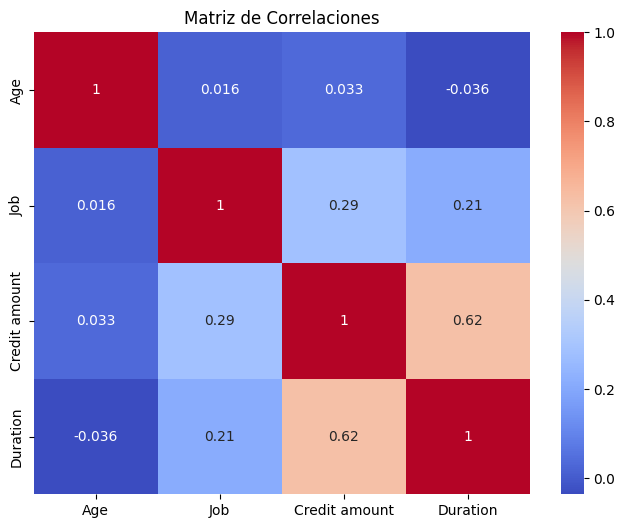

In [19]:
# 5. Correlaciones entre variables numéricas
corr_matrix = df[num_vars].corr()
print("\nMatriz de correlaciones:")
print(corr_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlaciones')
plt.show()

La matriz de correlaciones entre variables numéricas revela relaciones coherentes con la lógica financiera. La correlación más alta (0.62) se presenta entre el importe del crédito y la duración, lo que indica que los préstamos de mayor valor suelen concederse a plazos más largos. Además, el nivel de trabajo (Job) guarda correlaciones positivas moderadas con el monto (0.29) y la duración (0.21), reflejando que las personas con empleos más calificados tienden a acceder a créditos más grandes y prolongados. Por el contrario, la edad muestra correlaciones muy bajas con las demás variables, lo que sugiere que el criterio etario tiene un peso menor en las decisiones de crédito. En síntesis, el análisis evidencia que la calificación laboral y el tamaño del crédito son factores estrechamente vinculados, mientras que la edad no influye de manera significativa.

### Agrupaciones

In [20]:
# Promedios por Sexo
print("\nPromedios por Sexo:")
print(df.groupby('Sex')[num_vars].mean())

# Promedios por Purpose
print("\nPromedios por Purpose:")
print(df.groupby('Purpose')[['Credit amount', 'Duration']].mean().sort_values(by='Credit amount', ascending=False))

# Tabla cruzada: Housing vs. Saving accounts
print("\nTabla cruzada Housing vs. Saving accounts:")
print(pd.crosstab(df['Housing'], df['Saving accounts'], dropna=False))


Promedios por Sexo:
              Age       Job  Credit amount  Duration
Sex                                                 
female  32.803226  1.835484    2877.774194  19.43871
male    36.778261  1.934783    3448.040580  21.56087

Promedios por Purpose:
                     Credit amount   Duration
Purpose                                      
vacation/others        8209.333333  32.333333
business               4158.041237  26.938144
car                    3768.192878  20.813056
furniture/equipment    3066.988950  19.292818
education              2879.203390  19.677966
repairs                2728.090909  19.090909
radio/TV               2487.653571  20.046429
domestic appliances    1498.000000  16.833333

Tabla cruzada Housing vs. Saving accounts:
Saving accounts  little  moderate  quite rich  rich  NaN
Housing                                                 
free                 67        10           6     2   23
own                 430        71          45    37  130
rent       

La relación entre el tipo de vivienda y las cuentas de ahorro refleja un patrón claro de estabilidad económica. Las personas con vivienda propia se concentran en las categorías de ahorro más altas (“quite rich” y “rich”), lo que sugiere una mayor capacidad de acumulación y estabilidad financiera. En contraste, quienes viven en arriendo o de forma gratuita predominan en los niveles “little” o sin información (NaN), evidenciando una posición económica más vulnerable o un menor acceso al sistema financiero formal. Este comportamiento sugiere que la propiedad de vivienda está estrechamente ligada al ahorro y a la acumulación patrimonial, mientras que la falta de propiedad y el bajo ahorro podrían representar factores de riesgo crediticio o exclusión financiera.

Los promedios por sexo permiten observar diferencias notables entre hombres y mujeres en el acceso al crédito. En promedio, las mujeres son más jóvenes (32.8 años frente a 36.8 en hombres), poseen ligeramente menor nivel laboral (1.83 vs 1.93) y solicitan créditos más pequeños (2,878 marcos frente a 3,448) con plazos más cortos (19.4 frente a 21.6 meses). Este patrón puede reflejar brechas de género en el mercado laboral o en la asignación de riesgo crediticio, donde las mujeres tienden a solicitar préstamos de consumo o de menor cuantía, mientras los hombres acceden a créditos más grandes y extensos, posiblemente por diferencias de ingresos o estabilidad laboral.

### Valores atipicos

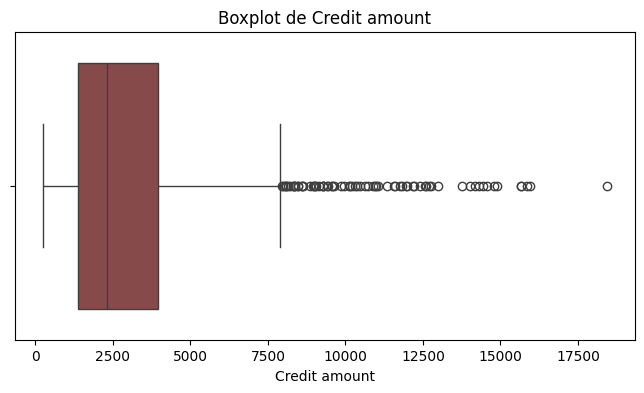

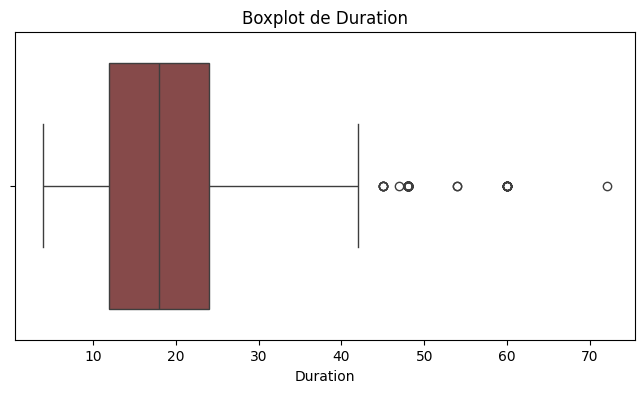

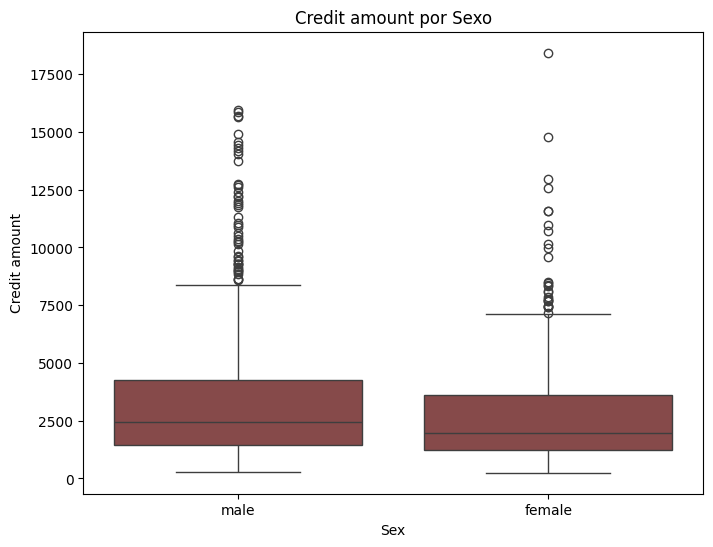

In [21]:
# Boxplot para Credit amount
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Credit amount', color="#904040")
plt.title('Boxplot de Credit amount')
plt.show()

# Boxplot para Duration
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Duration', color="#904040")
plt.title('Boxplot de Duration')
plt.show()

# Boxplot de Credit amount por Sex
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Credit amount', data=df, color="#904040")
plt.title('Credit amount por Sexo')
plt.show()

### Graficos

### Distribucion de las personas que piden un prestamo

   Age Group  Frecuencia
0      18-22         105
1      24-28         229
2      29-33         182
3      34-38         164
4      39-43         102
5      44-48          79
6      49-53          50
7      54-58          35
8      59-63          26
9      64-68          21
10     69-73           7


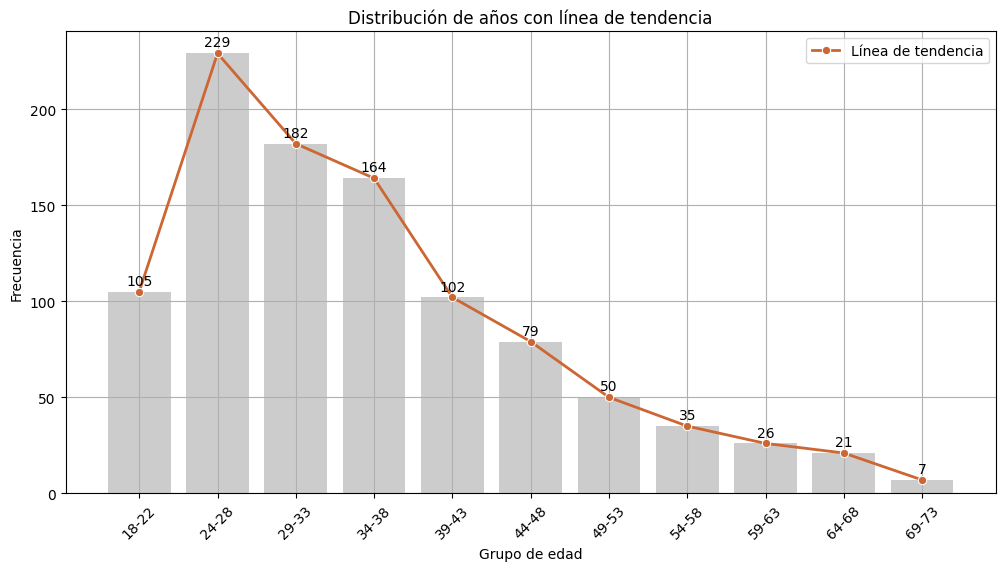

In [22]:

# Agrupamos los datos por intervalos de edad.
bins = [18, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 80]
labels = [f'{i}-{i+4}' for i in bins[:-1]]

# Crear una nueva columna 'Age Group' con los grupos de edad.
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Contar la frecuencia de cada grupo de edad
age_distribution = df['Age Group'].value_counts().sort_index()

# Ver la distribución como tabla ordenada
print(age_distribution.reset_index(name='Frecuencia'))

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=age_distribution.index, y=age_distribution.values, color='#CCCCCC')

# Añadir etiquetas encima de cada barra
for index, value in enumerate(age_distribution.values):
    plt.text(index, value + 2, str(value), ha='center', va='bottom', fontsize=10)

# Calcular y graficar la línea de tendencia
sns.lineplot(x=age_distribution.index, y=age_distribution.values, 
             color='#CC6633', marker='o', linewidth=2, label='Línea de tendencia')

# Etiquetas y título
plt.xlabel('Grupo de edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de años con línea de tendencia')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
plt.legend()

# Mostrar la cuadrícula y la gráfica
plt.grid()
plt.show()

La distribución de edades presenta una forma asimétrica hacia la derecha, con mayor concentración en el grupo de 24 a 28 años (229 casos), seguido de los rangos 29-33 y 34-38, que también muestran alta participación. A partir de los 40 años, la frecuencia disminuye progresivamente, llegando a valores mínimos en los mayores de 65. Esta tendencia indica que la mayoría de los solicitantes de crédito son adultos jóvenes en etapas laborales iniciales o de consolidación, lo que coincide con la fase de mayor demanda de financiamiento para consumo, vivienda o vehículos. La curva de tendencia confirma una caída constante con el aumento de la edad, reflejando una base de clientes predominantemente joven.

### Credito por genero

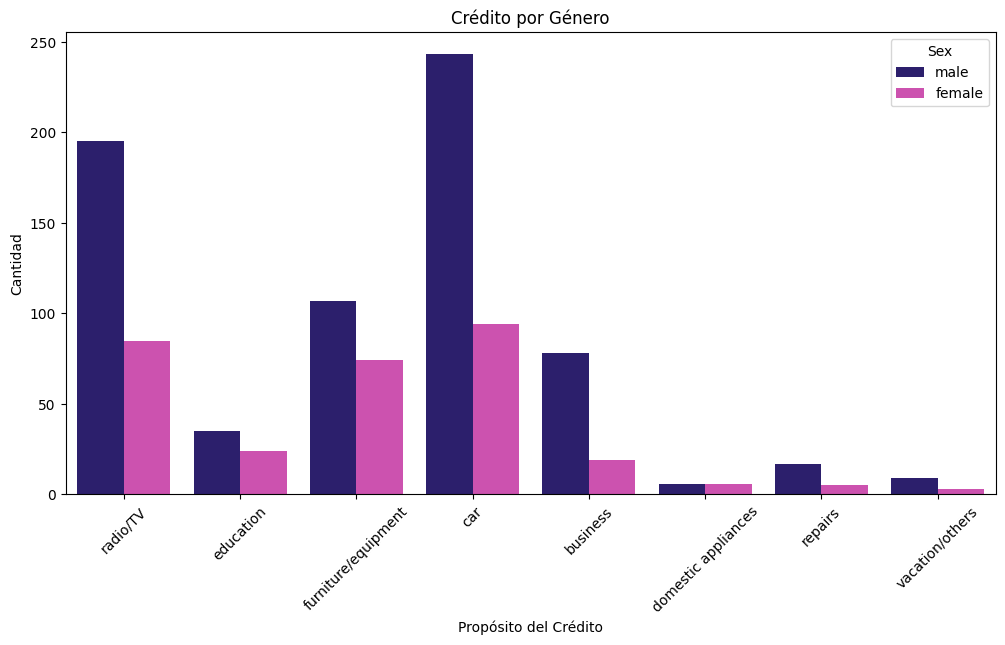

       Sex              Purpose  Count  Percentage
0   female             business     19    6.129032
1   female                  car     94   30.322581
2   female  domestic appliances      6    1.935484
3   female            education     24    7.741935
4   female  furniture/equipment     74   23.870968
5   female             radio/TV     85   27.419355
6   female              repairs      5    1.612903
7   female      vacation/others      3    0.967742
8     male             business     78   11.304348
9     male                  car    243   35.217391
10    male  domestic appliances      6    0.869565
11    male            education     35    5.072464
12    male  furniture/equipment    107   15.507246
13    male             radio/TV    195   28.260870
14    male              repairs     17    2.463768
15    male      vacation/others      9    1.304348


In [25]:
# Ajustar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Gráfico de barras agrupado por 'Sex' y 'Purpose'
sns.countplot(data=df, x='Purpose', hue='Sex', palette=("#231279", "#E03EBA") )

# Personalización del gráfico
plt.title('Crédito por Género')
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización
plt.xlabel('Propósito del Crédito')
plt.ylabel('Cantidad')

# Mostrar el gráfico
plt.show()

# Agrupar por 'Sex' y 'Purpose' y contar las observaciones
valores_exactos = df.groupby(['Sex', 'Purpose']).size().reset_index(name='Count')

# Calcular el total de observaciones por cada género
total_por_genero = valores_exactos.groupby('Sex')['Count'].transform('sum')

# Añadir una columna con el porcentaje
valores_exactos['Percentage'] = (valores_exactos['Count'] / total_por_genero) * 100

# Mostrar los valores exactos con porcentaje
print(valores_exactos)

El gráfico de créditos por género evidencia una mayor participación masculina en casi todas las categorías de propósito. Los hombres solicitan especialmente créditos para automóviles y radio/TV, que son los rubros con mayor volumen total, mientras que las mujeres presentan niveles menores, aunque mantienen cierta presencia en muebles/equipos y educación. En propósitos como negocios y vacaciones, la diferencia entre géneros se acentúa a favor de los hombres. En conjunto, el patrón sugiere que los hombres tienden a financiar bienes duraderos y de mayor valor, mientras que las mujeres concentran su demanda en créditos de consumo doméstico o educativo, probablemente asociados a gastos del hogar o formación.

### Grafico de torta

                    Descripción  Casos
0                    Calificado    630
1     No calificado y residente    200
2          Altamente calificado    148
3  No calificado y no residente     22


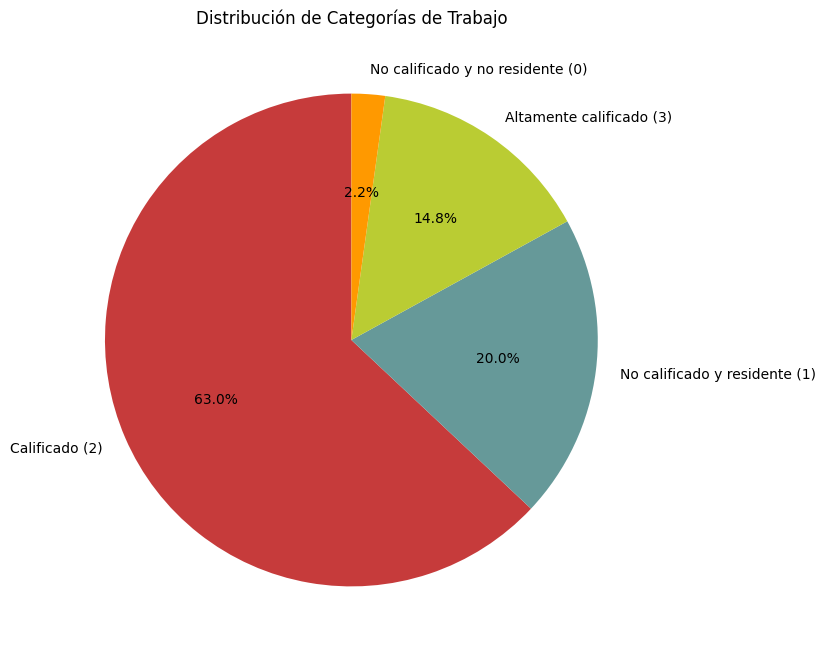

In [27]:

# Calcular los valores únicos de la variable 'Job' y sus frecuencias
valores_job = df['Job'].value_counts()

# Diccionario con las descripciones de los trabajos
descripciones = {
    0: 'No calificado y no residente',
    1: 'No calificado y residente',
    2: 'Calificado',
    3: 'Altamente calificado'
}

# Crear un DataFrame con la descripción y cantidad de casos
tabla_valores = pd.DataFrame({
    'Descripción': [descripciones[job] for job in valores_job.index],
    'Casos': valores_job.values
})

# Mostrar la tabla en consola
print(tabla_valores)

# Crear el gráfico de torta sin mostrar las cantidades en las etiquetas
etiquetas = [f"{descripciones[job]} ({job})" for job in valores_job.index]

plt.figure(figsize=(8, 8))  # Tamaño del gráfico
plt.pie(
    valores_job, 
    labels=etiquetas, 
    autopct='%1.1f%%',  # Mostrar porcentaje con un decimal
    startangle=90,  # Rotar para que comience en la parte superior
    colors=["#C63B3B", '#669999', "#BACC33", '#FF9900']  # Colores personalizados
)

# Añadir título
plt.title('Distribución de Categorías de Trabajo')

# Mostrar el gráfico
plt.show()

La distribución de las categorías laborales muestra una fuerte concentración en el grupo calificado (63%), seguido de no calificado y residente (20%), mientras que los altamente calificados (15%) y los no calificados y no residentes (2%) representan una minoría. Este patrón revela que la mayor parte de los solicitantes de crédito pertenece a niveles medios de cualificación, posiblemente empleados estables con ingresos moderados. La baja representación de trabajadores no residentes o altamente calificados sugiere un acceso limitado al crédito para los primeros y una menor necesidad de financiamiento para los segundos, reflejando así un perfil de clientes de clase trabajadora consolidada.

### Regresion de genero

In [31]:
# Filtrar datos por género
df_male = df[df['Sex'] == 'male']
df_female = df[df['Sex'] == 'female']

#### Regresion Male

In [32]:
X_male = df_male[['Age']]
y_male = df_male['Credit amount']
model_male = LinearRegression()
model_male.fit(X_male, y_male)
coef_male = model_male.coef_[0]
intercept_male = model_male.intercept_
print(f'Hombres - Coeficiente: {coef_male}')
print(f'Hombres - Intercepto: {intercept_male}')

Hombres - Coeficiente: 6.203148477770989
Hombres - Intercepto: 3219.8995667820373


#### Regresion Female

In [33]:
X_female = df_female[['Age']]
y_female = df_female['Credit amount']
model_female = LinearRegression()
model_female.fit(X_female, y_female)
coef_female = model_female.coef_[0]
intercept_female = model_female.intercept_
print(f'Mujeres - Coeficiente: {coef_female}')
print(f'Mujeres - Intercepto: {intercept_female}')

Mujeres - Coeficiente: 1.1360464120843536
Mujeres - Intercepto: 2840.508206566175


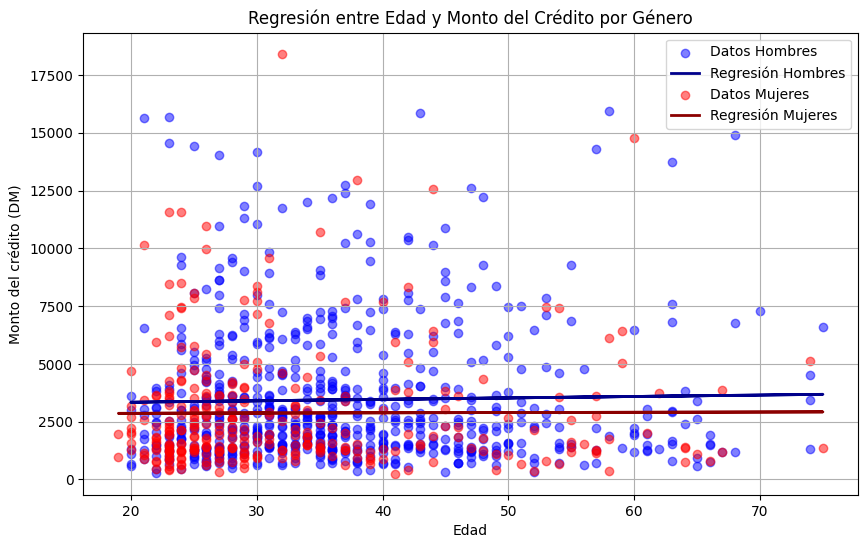

In [34]:
# Crear la gráfica combinada
plt.figure(figsize=(10, 6))

# Graficar datos y línea para hombres
plt.scatter(df_male['Age'], df_male['Credit amount'], color='blue', alpha=0.5, label='Datos Hombres')
plt.plot(df_male['Age'], model_male.predict(X_male), color='darkblue', linewidth=2, label='Regresión Hombres')

# Graficar datos y línea para mujeres
plt.scatter(df_female['Age'], df_female['Credit amount'], color='red', alpha=0.5, label='Datos Mujeres')
plt.plot(df_female['Age'], model_female.predict(X_female), color='darkred', linewidth=2, label='Regresión Mujeres')

# Etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Monto del crédito (DM)')
plt.title('Regresión entre Edad y Monto del Crédito por Género')
plt.legend()
plt.grid()
plt.show()

El gráfico de regresión muestra una relación débil entre la edad y el monto del crédito, con una pendiente casi plana para ambos géneros. Esto indica que el tamaño del préstamo no varía significativamente con la edad. Sin embargo, se observa que los hombres (puntos azules) tienden a solicitar montos ligeramente superiores y con mayor dispersión, especialmente en rangos medios de edad (30-45 años). Las mujeres (puntos rojos) presentan montos más concentrados y generalmente inferiores. Las líneas de regresión confirman que, aunque el efecto de la edad es mínimo, existe una diferencia estructural por género en el valor promedio del crédito, donde los hombres acceden a préstamos algo mayores, posiblemente asociados a su tipo de empleo o capacidad de ingreso